<a href="https://colab.research.google.com/github/pranithaujjuru/codingraja/blob/main/task1codr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow-gpu==2.11.0





In [ ]:
import tensorflow
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [ ]:
IMG_SIZE=[224,224]
train_ds='/content/drive/MyDrive/food11/train'
val_ds='/content/drive/MyDrive/food11/test'

In [ ]:
inception=InceptionV3(input_shape=IMG_SIZE + [3],weights='imagenet',include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
for layers in inception.layers:
  layers.trainable=False

In [ ]:
folders=glob('/content/drive/MyDrive/food11/train/*')
folders

['/content/drive/MyDrive/food11/train/hot_dog',
 '/content/drive/MyDrive/food11/train/pizza',
 '/content/drive/MyDrive/food11/train/fried_rice',
 '/content/drive/MyDrive/food11/train/chicken_curry',
 '/content/drive/MyDrive/food11/train/french_fries',
 '/content/drive/MyDrive/food11/train/hamburger',
 '/content/drive/MyDrive/food11/train/sushi',
 '/content/drive/MyDrive/food11/train/cheesecake',
 '/content/drive/MyDrive/food11/train/ice_cream',
 '/content/drive/MyDrive/food11/train/omelette',
 '/content/drive/MyDrive/food11/train/apple_pie']

In [ ]:
x=Flatten()(inception.output)

In [ ]:
predict=Dense(len(folders),activation='softmax')(x)

In [ ]:
model=Model(inputs=inception.input,outputs=predict)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_datagen=ImageDataGenerator(rescale= 1.0/255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale= 1.0/255)

In [ ]:
train_data=train_datagen.flow_from_directory('/content/drive/MyDrive/food11/train',
                                             target_size=(224,224),
                                             batch_size=16,
                                             class_mode='categorical')

Found 9943 images belonging to 11 classes.


In [ ]:
test_data=test_datagen.flow_from_directory('/content/drive/MyDrive/food11/test',
                                             target_size=(224,224),
                                             batch_size=16,
                                             class_mode='categorical')

Found 1100 images belonging to 11 classes.


In [ ]:
r=model.fit_generator(
    train_data,
    validation_data=test_data,
    epochs=2,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data)

)


<ipython-input-27-66938872aebc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(


Epoch 1/2
622/622 [==============================] - 3558s 6s/step - loss: 7.1588 - accuracy: 0.6457 - val_loss: 6.7651 - val_accuracy: 0.6973
Epoch 2/2
622/622 [==============================] - 1356s 2s/step - loss: 6.3170 - accuracy: 0.7374 - val_loss: 6.6254 - val_accuracy: 0.7400


In [ ]:
test_loss,test_acc=model.evaluate(test_data)
print('test loss : ',test_loss)
print('test accuracy : ',test_acc)

69/69 [==============================] - 126s 2s/step - loss: 6.6254 - accuracy: 0.7400
test loss :  6.625442028045654
test accuracy :  0.7400000095367432


In [ ]:
predictions = model.predict(test_data)
class_labels = list(test_data.class_indices.keys())

69/69 [==============================] - 127s 2s/step


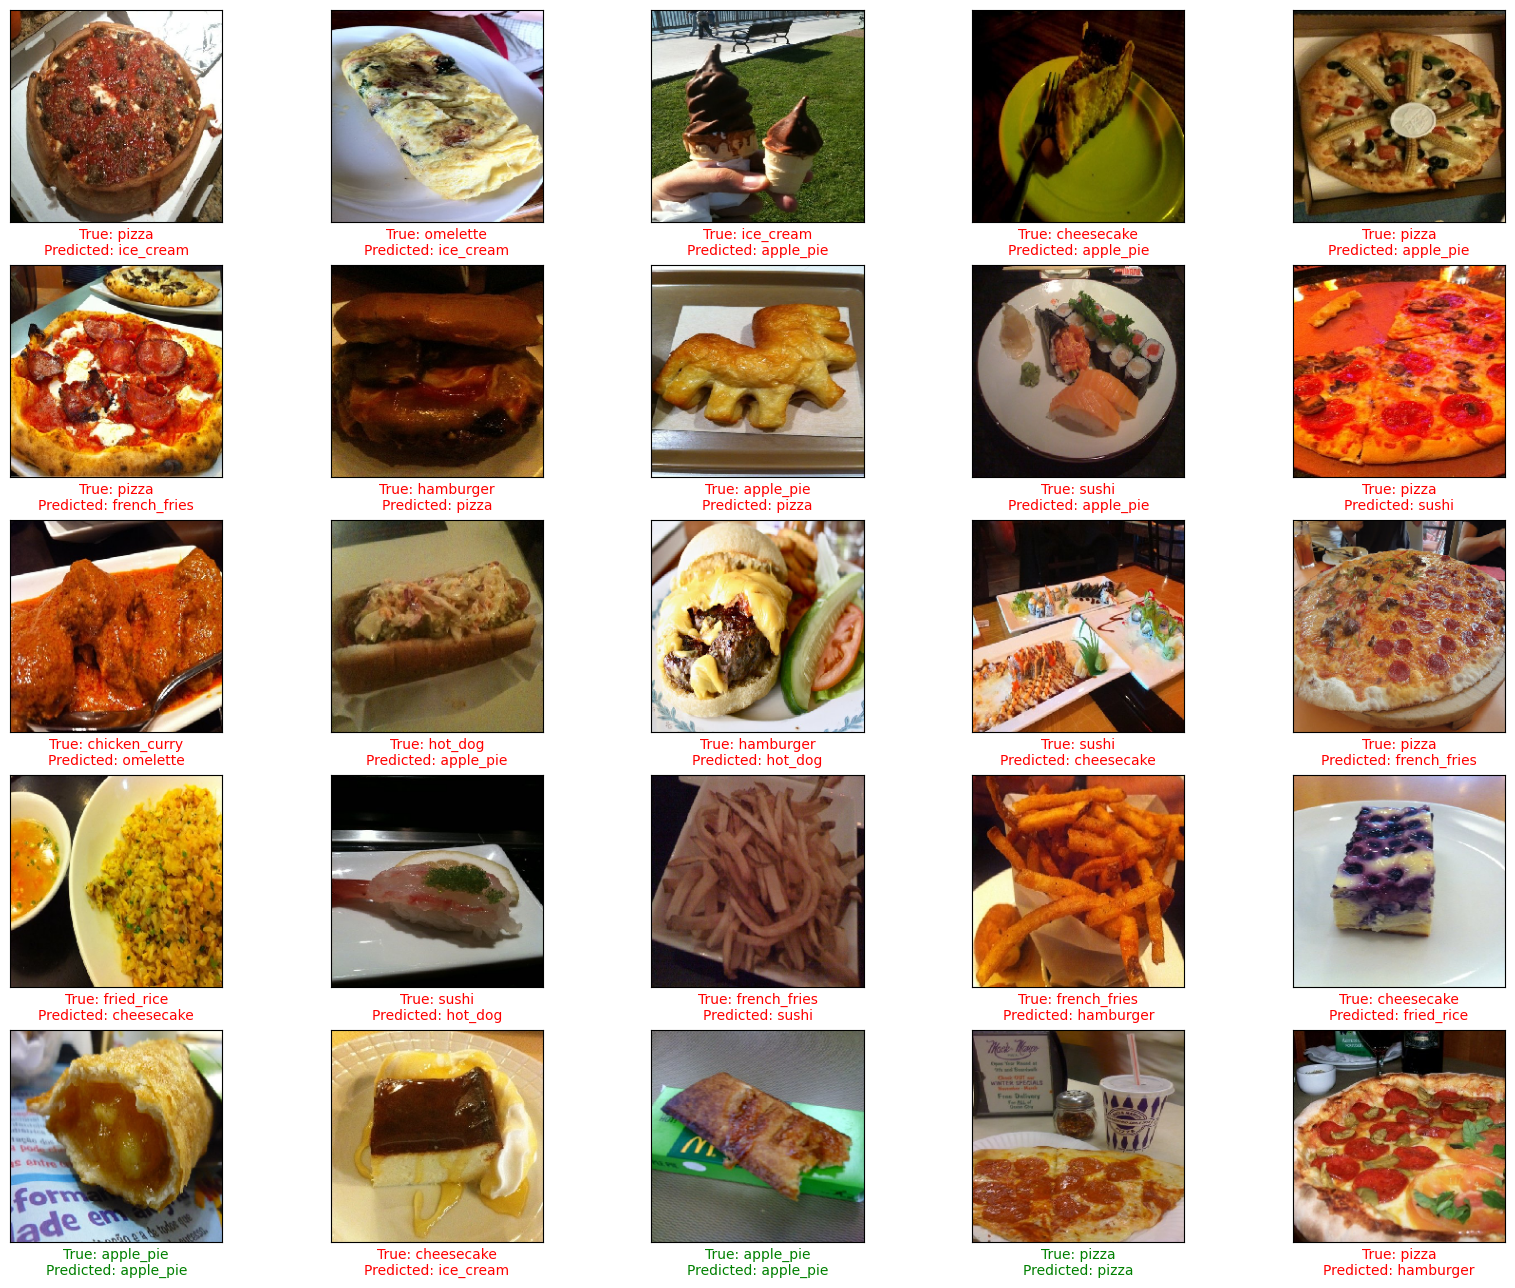

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
num_images_to_visualize = 25
ran_indices = random.sample(range(len(test_data)), num_images_to_visualize)

plt.figure(figsize=(20, 16))
for i, idx in enumerate(ran_indices):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_data[idx][0][0], cmap=plt.cm.binary)
    true_label = class_labels[np.argmax(test_data[idx][1])]
    predicted_label = class_labels[np.argmax(predictions[idx])]
    if true_label == predicted_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"True: {true_label}\nPredicted: {predicted_label}", color=color)
plt.show()
